TODO
- see the FMP.py file

In [1]:
import requests
import pandas as pd
from pathlib import Path
from FMP2 import FinancialData, Analysis, Company
from matplotlib import pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()
    

yf.pdr_override()

Financial statements had different lengths...
Financial statement lengths are BS: 37, IS:37, CFS:34
financial statement lengths are now each: 34
[*********************100%***********************]  1 of 1 completed
8722
C:\Users\John\Desktop\Git\investment-tools\Financial Modelling Prep Library\Company Financial Data\MSFT\annual already exists. Overwriting data.
There were 2/34 values in ebitdaratio that exceed the 0.05 error tolerance.
There were 0/34 values in grossProfitRatio that exceed the 0.05 error tolerance.
There were 6/34 values in operatingIncomeRatio that exceed the 0.05 error tolerance.
There were 4/34 values in incomeBeforeTaxRatio that exceed the 0.05 error tolerance.
There were 14/34 values in netIncomeRatio that exceed the 0.05 error tolerance.
There were 0/34 values in eps that exceed the 0.05 error tolerance.


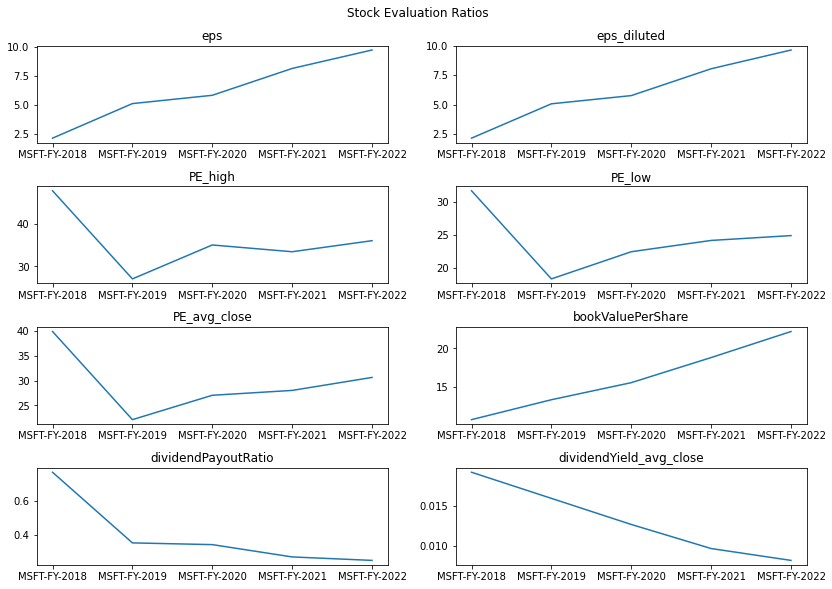

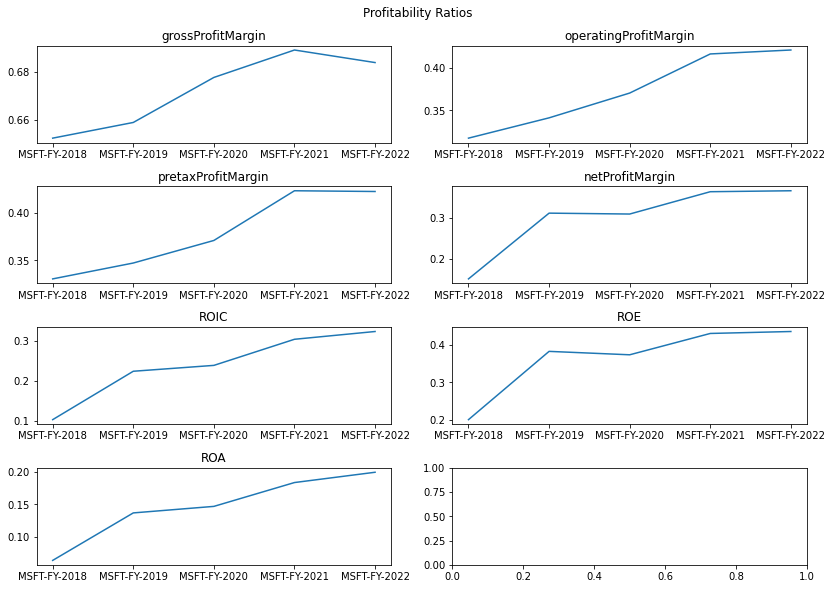

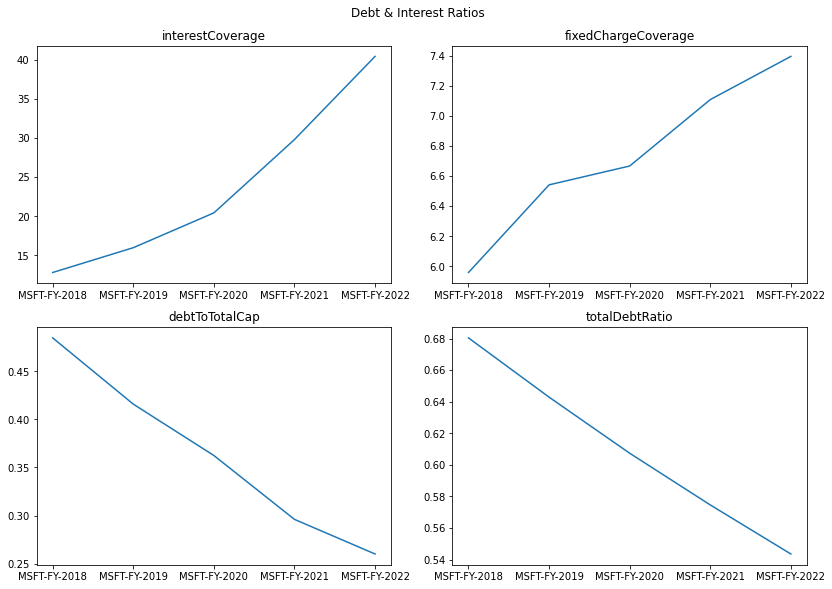

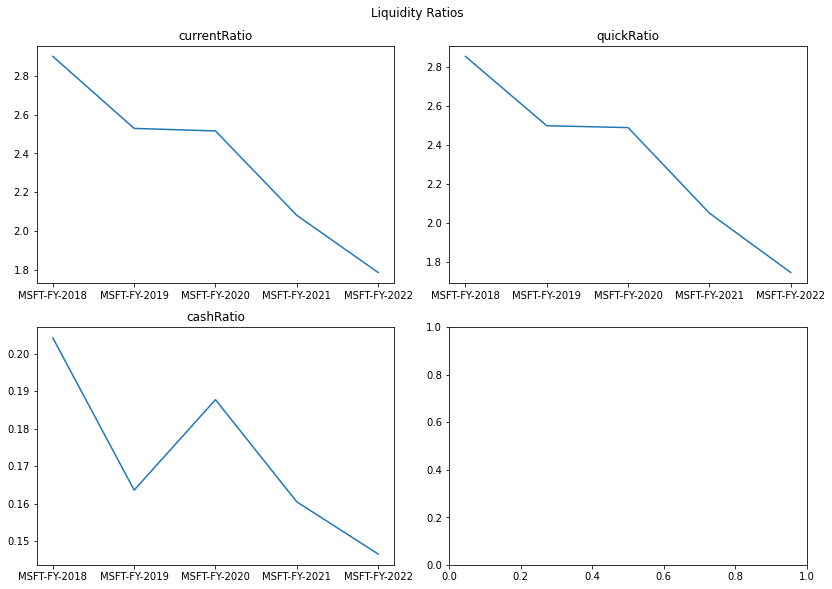

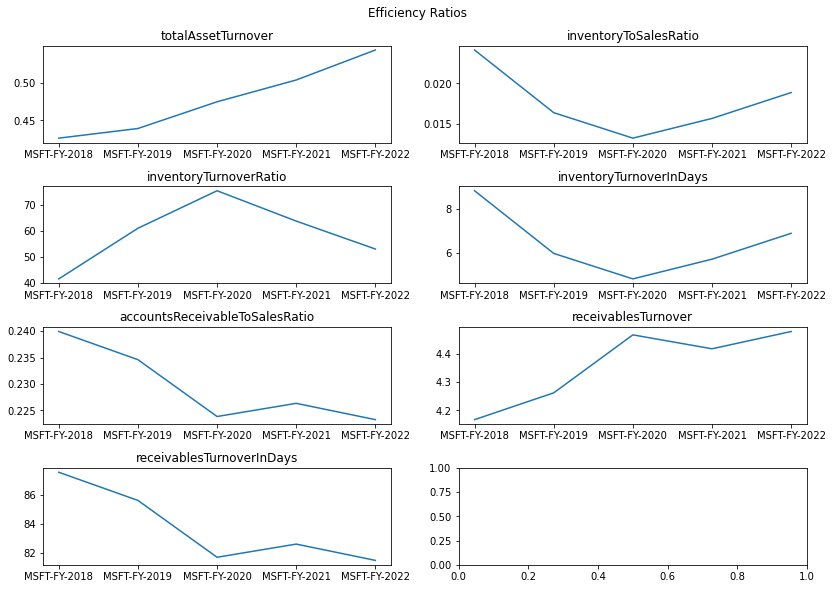

In [2]:
a = Company('MSFT', api_key=api_key, data='online')
#ZTS

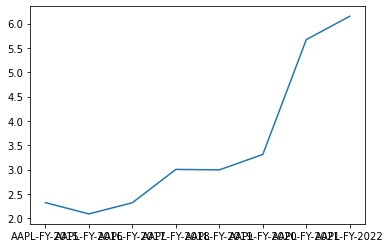

In [18]:
plt.plot(a.financial_data._frame_indecies[-8:], a.metrics['eps'][-8:])

In [20]:
(sorted(a.metrics.keys()))

['PE_avg_close',
 'PE_high',
 'PE_low',
 'ROA',
 'ROE',
 'ROIC',
 'accountsReceivableToSalesRatio',
 'bookValuePerShare',
 'cashRatio',
 'currentRatio',
 'debtToTotalCap',
 'dividendPayoutRatio',
 'dividend_yield_avg_close',
 'dividend_yield_high',
 'dividend_yield_low',
 'editdaratio',
 'eps',
 'eps_diluted',
 'fixed_charge_coverage',
 'grossProfitMargin',
 'interestCoverage',
 'inventoryToSalesRatio',
 'inventoryTurnoverInDays',
 'inventoryTurnoverRatio',
 'operatingIncome_calc',
 'operatingProfitMargin',
 'pretaxProfitMargin',
 'quickRatio',
 'receivablesTurnover',
 'receivablesTurnoverInDays',
 'totalAssetTurnover',
 'totalDebtRatio']

In [27]:
a.financial_data.balance_sheets['date'].

AttributeError: 'Series' object has no attribute 'split'

In [5]:
(sorted(a.cash_flow_statements.keys()))

['acceptedDate',
 'accountsPayables',
 'accountsReceivables',
 'acquisitionsNet',
 'calendarYear',
 'capitalExpenditure',
 'cashAtBeginningOfPeriod',
 'cashAtEndOfPeriod',
 'changeInWorkingCapital',
 'cik',
 'commonStockIssued',
 'commonStockRepurchased',
 'date',
 'debtRepayment',
 'deferredIncomeTax',
 'depreciationAndAmortization',
 'dividendsPaid',
 'effectOfForexChangesOnCash',
 'fillingDate',
 'finalLink',
 'freeCashFlow',
 'inventory',
 'investmentsInPropertyPlantAndEquipment',
 'link',
 'netCashProvidedByOperatingActivities',
 'netCashUsedForInvestingActivites',
 'netCashUsedProvidedByFinancingActivities',
 'netChangeInCash',
 'netIncome',
 'operatingCashFlow',
 'otherFinancingActivites',
 'otherInvestingActivites',
 'otherNonCashItems',
 'otherWorkingCapital',
 'period',
 'purchasesOfInvestments',
 'reportedCurrency',
 'salesMaturitiesOfInvestments',
 'stockBasedCompensation',
 'symbol']

In [3]:
a.metrics

,eps,eps_diluted,PE_high,PE_low,PE_avg_close,bookValuePerShare,dividendPayoutRatio,dividend_yield_low,dividend_yield_high,dividend_yield_avg_close,...,currentRatio,quickRatio,cashRatio,totalAssetTurnover,inventoryToSalesRatio,inventoryTurnoverRatio,inventoryTurnoverInDays,accountsReceivableToSalesRatio,receivablesTurnover,receivablesTurnoverInDays
index,,,,,,,,,,,,,,,,,,,,,
AAPL-FY-1989,0.031607,0.031607,NaN,NaN,NaN,0.103433,0.110793,NaN,NaN,NaN,...,2.562716,2.031721,0.489557,1.925726,0.089970,11.114851,32.838948,0.150038,6.664985,54.763815
AAPL-FY-1990,0.033750,0.033750,13.326726,7.209007,10.491598,0.102821,0.113287,0.008501,0.015715,0.010798,...,2.340117,1.993963,0.364849,1.867930,0.063957,15.635443,23.344398,0.137072,7.295446,50.031214
AAPL-FY-1991,0.023036,0.023036,28.391126,9.399114,18.754767,0.131368,0.182376,0.006424,0.019404,0.009724,...,2.352806,1.800920,0.496344,1.805816,0.106470,9.392288,38.861669,0.143799,6.954145,52.486685
AAPL-FY-1992,0.038750,0.038750,16.129032,9.562219,12.484125,0.159807,0.107843,0.006686,0.011278,0.008638,...,2.496247,2.089302,0.349772,1.677794,0.081860,12.215997,29.878854,0.153418,6.518120,55.997742
AAPL-FY-1993,0.006607,0.006607,88.177535,31.757379,63.850729,0.154601,0.642032,0.007281,0.020217,0.010055,...,1.724873,1.125875,0.268925,1.542522,0.188868,5.294703,68.936818,0.173236,5.772487,63.230977
AAPL-FY-1994,0.023304,0.023304,14.750687,8.428982,12.099007,0.179060,0.182386,0.012365,0.021638,0.015074,...,2.302340,1.742534,0.618981,1.732828,0.118453,8.442173,43.235315,0.172096,5.810709,62.815049
AAPL-FY-1995,0.030804,0.030804,14.528795,9.420173,11.926308,0.210760,0.136792,0.009415,0.014521,0.011470,...,2.246882,1.483441,0.325161,1.775317,0.160459,6.232113,58.567619,0.174562,5.728638,63.714970
AAPL-FY-1996,-0.058839,-0.058839,-6.449192,-2.427930,-4.267617,0.148395,-0.017157,0.002660,0.007066,0.004020,...,2.254119,1.923615,0.774838,1.833147,0.067324,14.853474,24.573375,0.152141,6.572861,55.531374
AAPL-FY-1997,-0.074018,-0.074018,-3.566038,-1.537991,-2.372018,0.084997,-0.000000,0.000000,0.000000,0.000000,...,1.883388,1.643014,0.676568,1.672809,0.061714,16.203661,22.525773,0.146166,6.841546,53.350515


In [20]:
a.income_statements['ebitda']

index
AAPL-FY-1989       869100000
AAPL-FY-1990       981200000
AAPL-FY-1991       704100000
AAPL-FY-1992      1072700000
AAPL-FY-1993       305800000
AAPL-FY-1994       707897000
AAPL-FY-1995       849000000
AAPL-FY-1996     -1079000000
AAPL-FY-1997      -856000000
AAPL-FY-1998       502000000
AAPL-FY-1999       808000000
AAPL-FY-2000      1197000000
AAPL-FY-2001        78000000
AAPL-FY-2002       216000000
AAPL-FY-2003       214000000
AAPL-FY-2004       536000000
AAPL-FY-2005      1994000000
AAPL-FY-2006      3043000000
AAPL-FY-2007      5325000000
AAPL-FY-2008      7368000000
AAPL-FY-2009      8687000000
AAPL-FY-2010     19567000000
AAPL-FY-2011     36019000000
AAPL-FY-2012     59040000000
AAPL-FY-2013     57048000000
AAPL-FY-2014     61813000000
AAPL-FY-2015     84505000000
AAPL-FY-2016     73333000000
AAPL-FY-2017     76569000000
AAPL-FY-2018     87046000000
AAPL-FY-2019     81860000000
AAPL-FY-2020     81020000000
AAPL-FY-2021    123136000000
AAPL-FY-2022    133138000000
Name: eb

In [21]:
a.cash_flow_statements['depreciationAndAmortization']

index
AAPL-FY-1989      124800000
AAPL-FY-1990      202700000
AAPL-FY-1991      204400000
AAPL-FY-1992      217200000
AAPL-FY-1993      166100000
AAPL-FY-1994      167958000
AAPL-FY-1995      127000000
AAPL-FY-1996      156000000
AAPL-FY-1997      118000000
AAPL-FY-1998      111000000
AAPL-FY-1999       85000000
AAPL-FY-2000       84000000
AAPL-FY-2001      102000000
AAPL-FY-2002      118000000
AAPL-FY-2003      113000000
AAPL-FY-2004      150000000
AAPL-FY-2005      179000000
AAPL-FY-2006      225000000
AAPL-FY-2007      317000000
AAPL-FY-2008      473000000
AAPL-FY-2009      703000000
AAPL-FY-2010     1027000000
AAPL-FY-2011     1814000000
AAPL-FY-2012     3277000000
AAPL-FY-2013     6757000000
AAPL-FY-2014     7946000000
AAPL-FY-2015    11257000000
AAPL-FY-2016    10505000000
AAPL-FY-2017    10157000000
AAPL-FY-2018    10903000000
AAPL-FY-2019    12547000000
AAPL-FY-2020    11056000000
AAPL-FY-2021    11284000000
AAPL-FY-2022    11104000000
Name: depreciationAndAmortization, dtype: 

In [5]:
a.cash_flow_statements['dividendsPaid']

index
AAPL-FY-1989      -50300000
AAPL-FY-1990      -53800000
AAPL-FY-1991      -56500000
AAPL-FY-1992      -57200000
AAPL-FY-1993      -55600000
AAPL-FY-1994      -56572000
AAPL-FY-1995      -58000000
AAPL-FY-1996      -14000000
AAPL-FY-1997              0
AAPL-FY-1998              0
AAPL-FY-1999              0
AAPL-FY-2000              0
AAPL-FY-2001              0
AAPL-FY-2002              0
AAPL-FY-2003              0
AAPL-FY-2004              0
AAPL-FY-2005              0
AAPL-FY-2006              0
AAPL-FY-2007              0
AAPL-FY-2008              0
AAPL-FY-2009              0
AAPL-FY-2010              0
AAPL-FY-2011              0
AAPL-FY-2012    -2488000000
AAPL-FY-2013   -10564000000
AAPL-FY-2014   -11126000000
AAPL-FY-2015   -11561000000
AAPL-FY-2016   -12150000000
AAPL-FY-2017   -12769000000
AAPL-FY-2018   -13712000000
AAPL-FY-2019   -14119000000
AAPL-FY-2020   -14081000000
AAPL-FY-2021   -14467000000
AAPL-FY-2022   -14841000000
Name: dividendsPaid, dtype: int64

In [22]:
a._check_calculated_values['operatingIncome']

index
AAPL-FY-1989       759100000
AAPL-FY-1990       914700000
AAPL-FY-1991       651700000
AAPL-FY-1992      1022900000
AAPL-FY-1993       276500000
AAPL-FY-1994       395419000
AAPL-FY-1995       661000000
AAPL-FY-1996     -1204000000
AAPL-FY-1997      -778000000
AAPL-FY-1998       261000000
AAPL-FY-1999       386000000
AAPL-FY-2000       620000000
AAPL-FY-2001      -344000000
AAPL-FY-2002        45000000
AAPL-FY-2003        25000000
AAPL-FY-2004       349000000
AAPL-FY-2005      1650000000
AAPL-FY-2006      2453000000
AAPL-FY-2007      4409000000
AAPL-FY-2008      6275000000
AAPL-FY-2009      7658000000
AAPL-FY-2010     18385000000
AAPL-FY-2011     33790000000
AAPL-FY-2012     55241000000
AAPL-FY-2013     48999000000
AAPL-FY-2014     52503000000
AAPL-FY-2015     71230000000
AAPL-FY-2016     60024000000
AAPL-FY-2017     61344000000
AAPL-FY-2018     70898000000
AAPL-FY-2019     63930000000
AAPL-FY-2020     66288000000
AAPL-FY-2021    108949000000
AAPL-FY-2022    119437000000
Name: op

In [ ]:
a.ratio_errors.sum()

In [ ]:
a.income_statements['eps']
x = a.income_statements.index[-10:]
y = a.income_statements['eps'][-10:]
plt.plot(x,y)

In [ ]:
a.calculated_ratios['operatingProfitMargin'].iloc[0]

In [ ]:
import datetime as dt

In [ ]:
dt.date(*[int(i) for i in a.balance_sheets['date'].iloc[0].split('-')])

In [ ]:
dt.date(1985, 9, 30) < dt.date(1986, 9, 30)

In [ ]:
"1985-09-30 00:00:00-04:00".split()[0]

In [ ]:
pd.Series([i for i in range(10)]).iloc[0]

In [ ]:
a.stock_price_data['date'] = a.stock_price_data.index.date

In [ ]:
y1 = a.stock_price_data['date'][5]
y2 = a.stock_price_data['date'][12]
a.stock_price_data[(a.stock_price_data['date'] > y1) & (a.stock_price_data['date']< y2)]

In [3]:
data = [[i for i in range(4)] for j in range(4)]

In [7]:
a.stock_price_data.index == a.balance_sheets.index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [6]:
len(a.stock_price_data), len(a.balance_sheets)

(34, 34)

In [3]:
import numpy as np

In [8]:
index = sorted(pd.Series(list(set(a.balance_sheets['date']) & set(a.income_statements['date']))))

In [12]:
len(a.balance_sheets[a.balance_sheets['date'] == index])

38

In [2]:
from FMP2 import FinancialData, FinancialMetrics
from pathlib import Path
key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()

In [2]:
b = FinancialData('AAPL', api_key, 'online')

[*********************100%***********************]  1 of 1 completed
C:\Users\John\Desktop\Git\investment-tools\Financial Modelling Prep Library\Company Financial Data\AAPL\annual already exists. Overwriting data.


In [8]:
b.income_statements.index == b.cash_flow_statements.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])